# NBA Players Classification


We have used classification techniques to indentify the name of NBA Basketball players. Here, we took four basketball playes - Satnam Singh, Michael Jordan, Stephen Curry, Kobe BryanT and Lebron James


In [ ]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

## 1. Preprocessing : Detect face and eyes

When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>
Now how do you detect face and eyes?
We will use haar cascade from opencv for this. Here is an article on this: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_objdetect/py_face_detection/py_face_detection.html?highlight=haar

In [2]:
img = cv2.imread('C:/ml_project/basketball_players_classifier/model/test_images/stephencurry.jpg') #USED CV2.IMREAD TO LOAD IMAGE
img.shape #shows the shape of the image

(2427, 1821, 3)

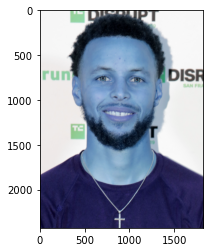

In [4]:
plt.imshow(img) #DISPLAY TEST IMAGE OF JORDAN USING OPEN CV IMSHOW


In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape  #WE NOTICED THAT GRAY HAS JUST SHOWED US 2 DIMENSIONAL

(2427, 1821)

In [8]:
gray #GRAY IS JUST AN N DIMENSIONAL ARRAY

array([[246, 246, 246, ..., 248, 248, 248],
       [246, 246, 246, ..., 247, 247, 247],
       [246, 246, 246, ..., 247, 247, 247],
       ...,
       [ 17,  22,  30, ...,  34,  35,  37],
       [ 17,  22,  28, ...,  35,  36,  38],
       [ 19,  22,  27, ...,  36,  37,  39]], dtype=uint8)

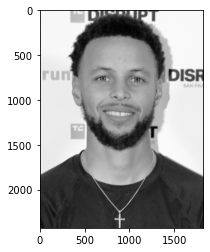

In [9]:
plt.imshow(gray, cmap='gray')
#USED MATPLOTLIB TO SHOW THE GRAY IMAGE

In [10]:
face_cascade = cv2.CascadeClassifier('C:/ml_project/basketball_players_classifier/model/opencv/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/ml_project/basketball_players_classifier/model/opencv/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces
# WE USED OPENCV HAARCASCADE_FRONTALFACE_DEFAULT TO DETECT THE FACE
# WE USED OPEN CV HAARCASCADE_EYE TO DETECT THE EYES
# WE CALLED FACE HERE
#HERE THE FOUR VALUES ARE X,Y,WIDTH AND HEIGTH

array([[ 367,  354, 1038, 1038]])

In [11]:
(x,y,w,h) = faces[0]
x,y,w,h

(367, 354, 1038, 1038)

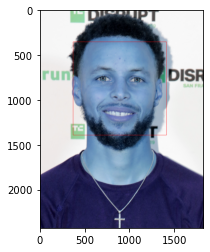

In [12]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2) # USED CV2.RECTANGLE TO DRAW RED RECTANGLE ON FACE, 255 REPRESENT RED COLOUR OF THE RECTANGLE
plt.imshow(face_img)

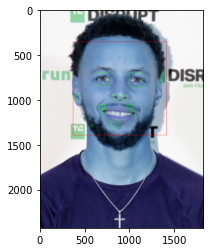

In [13]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show() #DETECT FACE AND EYES BOTH BY USING OPEN CV HAARCASCADE

## (2) Preprocessing: Crop the facial region of the image

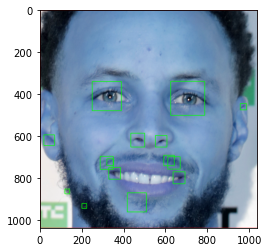

In [14]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray') #ROI MEANS REGION OF INTREST - CROPPED IMAGE

## (3) Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region

***A Python function that can take input image and returns cropped image (if face and eyes >=2 are detected)***

In [15]:
def get_cropped_image_if_2_eyes(image_path):  # CREATED FUNCTION NAMED GET CROPPED IMAGE IF 2 EYES
    img = cv2.imread(image_path)              # LOADS IMAGE
    if(img is not None):                      # THIS IS WILL RUN IF IMAGE IS PRESENT ELSE WILL EXIT
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # CONVERT THE IMAGE TO GRAY
        faces = face_cascade.detectMultiScale(gray, 1.3, 5) # DETECT THE FACE
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]    # GRAY COLOUR     
            roi_color = img[y:y+h, x:x+w]    # CROP THE IMAGE
            eyes = eye_cascade.detectMultiScale(roi_gray)  
            if len(eyes) >= 2:               # IF 2 EYES PRESENT THEN SHOW THE CROPPED IMAGE, IF NOT, EXIT THE LOOP AND DONT SHOW ANYTHING
                return roi_color   
    else:
        exit(1)

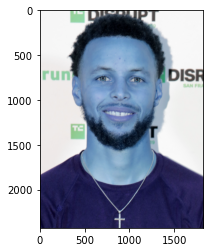

In [16]:
original_image = cv2.imread('C:/ml_project/basketball_players_classifier/model/test_images/stephencurry.jpg') #FOR TESTING PURPOSE, I AM UPLOADING THE IMAGE 
plt.imshow(original_image)

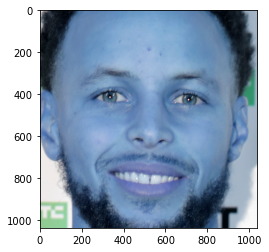

In [17]:
cropped_image = get_cropped_image_if_2_eyes('C:/ml_project/basketball_players_classifier/model/test_images/stephencurry.jpg')
plt.imshow(cropped_image) #CALLING THE FUNCTION AND PROVIDING THE PATH OF THE IMAGE

***In below image face is not very clear and it doesn't have two eyes clearly visible***

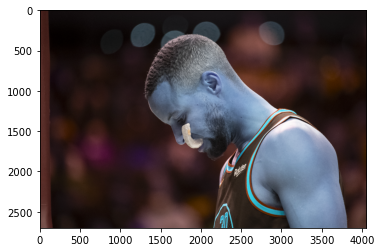

In [18]:
org_image_obstructed = cv2.imread('C:/ml_project/basketball_players_classifier/model/test_images/stephencurrytest.jpg')
plt.imshow(org_image_obstructed)

#LOADED THE OBSTRUCTED IMAGE OF STEPHEN CURRY FOR TESTING

In [19]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('C:/ml_project/basketball_players_classifier/model/test_images/stephencurrytest.jpg')
cropped_image_no_2_eyes

#RUN THE FUNCTION AND IT PROVIDED NO ROI BECAUSE IT CANNONT DETECT 2 EYES ON THE PICTURE

***Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training***

In [20]:
  # WE ARE NOW TRYING TO CREATE A CROPPED FOLDER FOR CROPPED IMAGES PROGRAMMATICALLY

path_to_data = 'C:/ml_project/basketball_players_classifier/model/dataset/'            # ENTERING THE PATH OF DATASET IN OUR LOCAL SYSTEM
path_to_cr_data = 'C:/ml_project/basketball_players_classifier/model/dataset/cropped/'   # ENTERING THE PATH WHERE WE WANT TO CREATE THE CROPPED FOLDER


In [21]:
# IMPORTED OS MODULE 

import os
img_dirs = []
for entry in os.scandir(path_to_data):  # USED OS.SCANDIR TO SCAN THE DIRECTORY IN THE DATASET FOLDER IN OUR LOCAL DESKTOP
    if entry.is_dir():
        img_dirs.append(entry.path)     #SAVED THE SCANNED DIRECTORY TO THE VARIABLE IMG_DIR

In [22]:
img_dirs #CALLED THE FUNCTION TO SHOW THE SCANNED DIRECTORY IN DATASET FOLDER IN OUR LOCAL SYSTEM

['C:/ml_project/basketball_players_classifier/model/dataset/cropped',
 'C:/ml_project/basketball_players_classifier/model/dataset/kobebryant',
 'C:/ml_project/basketball_players_classifier/model/dataset/lebronjames',
 'C:/ml_project/basketball_players_classifier/model/dataset/mjordan',
 'C:/ml_project/basketball_players_classifier/model/dataset/satnamsingh',
 'C:/ml_project/basketball_players_classifier/model/dataset/stephencurry']

***We went through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code***



In [23]:
# IMPORTED SHUTIL MODULE

import shutil
if os.path.exists(path_to_cr_data):      
     shutil.rmtree(path_to_cr_data)  # IF CROPPED FOLDER ALREADY EXIST,REMOVE IT
os.mkdir(path_to_cr_data)             # IF CROPPED FOLDER DOESN'T EXIST, CREATE IT

In [24]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1] # USED -1 TO ACCESS THE LAST ELEMENT FROM THE IMG DIR LIST
    print(celebrity_name)                   # PRINTED THE LAST NAME FROM THE DIRECTORY 
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path) # CALLING THE FUNCTION AND GETTING THE CROPPED IMAGE
        if roi_color is not None:                           # APPLIED CONDITION, IF CROPPED IMAGE EXIST
            cropped_folder = path_to_cr_data + celebrity_name # CREATED FOLDER WITH CELEBRITY NAME WITHING CROPPED FOLDER
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)  # IF CROPPED FOLDER NOT PRESENT, CREATE IT
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder) # THIS WILL PRINT IN THE OUTPUT WHEN FUNCTION IS RUNNING AND GENERATION CROPPED IMAGES
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name # RENAMED THE CROPPED IMAGES TO CELREBRITY NAME AND IMAGE NUMBER USING THE COUNTER 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1  

cropped
kobebryant
Generating cropped images in folder:  C:/ml_project/basketball_players_classifier/model/dataset/cropped/kobebryant
lebronjames
Generating cropped images in folder:  C:/ml_project/basketball_players_classifier/model/dataset/cropped/lebronjames
mjordan
Generating cropped images in folder:  C:/ml_project/basketball_players_classifier/model/dataset/cropped/mjordan
satnamsingh
Generating cropped images in folder:  C:/ml_project/basketball_players_classifier/model/dataset/cropped/satnamsingh
stephencurry
Generating cropped images in folder:  C:/ml_project/basketball_players_classifier/model/dataset/cropped/stephencurry


***Now we have cropped folder under datasets folder that contains cropped images, we manually examined cropped folder and deleted any unwanted images***

## (4) Preprocessing: Use wavelet transform as a feature for traning our model


***In wavelet transformed image, we can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc***

In [25]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):  # WAVELET TRANSFORMATION FUNCTION, HERE WE INPUT THE IMAGE AND IT WILL PERFORM THE WAVELET TRANSFORMATION USING PYWT MODULE
    imArray = img                     
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H  # RETURNS WAVELET TRANSFORMATED IMAGE

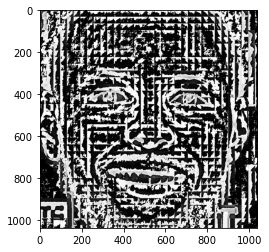

In [26]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

***We can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier***

In [27]:
class_dict = {}  # ASSIGNED RANDOM NUMBER TO EVERY PLAYER
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'kobebryant': 1,
 'lebronjames': 2,
 'mjordan': 3,
 'satnamsingh': 4,
 'stephencurry': 5}

In [28]:
celebrity_file_names_dict # DICTIONARY THAT WE CRATED EARLIER, IT CONTAINS KEYS AS CELEBRITY NAME AND VALUES AS ALL THE IMAGE LOCATION

{'cropped': [],
 'kobebryant': ['C:/ml_project/basketball_players_classifier/model/dataset/cropped/kobebryant/kobebryant1.png',
  'C:/ml_project/basketball_players_classifier/model/dataset/cropped/kobebryant/kobebryant2.png',
  'C:/ml_project/basketball_players_classifier/model/dataset/cropped/kobebryant/kobebryant3.png',
  'C:/ml_project/basketball_players_classifier/model/dataset/cropped/kobebryant/kobebryant4.png',
  'C:/ml_project/basketball_players_classifier/model/dataset/cropped/kobebryant/kobebryant5.png',
  'C:/ml_project/basketball_players_classifier/model/dataset/cropped/kobebryant/kobebryant6.png',
  'C:/ml_project/basketball_players_classifier/model/dataset/cropped/kobebryant/kobebryant7.png',
  'C:/ml_project/basketball_players_classifier/model/dataset/cropped/kobebryant/kobebryant8.png',
  'C:/ml_project/basketball_players_classifier/model/dataset/cropped/kobebryant/kobebryant9.png',
  'C:/ml_project/basketball_players_classifier/model/dataset/cropped/kobebryant/kobebrya

***Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now***

In [30]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items(): # THIS LOOP WILL ITERATE THROUGH THE SPORTS PERSONS
    for training_image in training_files:  # THIS LOOP WILL ITERATE THROUGH EVERY IMAGE FOR THAT PARTICULAR SPORTS PERSON
        img = cv2.imread(training_image)   #READING THE IMAGE USING OPENCV
        if img is None:  # USING NONE CONDTION TO AVOID IMAGE NOT PRESENT ERROR
            continue 
        scalled_raw_img = cv2.resize(img, (32, 32)) # SCALING THE IMAGES, BEUSE IMAGES CCAOULD BE OF DIFFERENT SIZE AND WE WILL PROVIDE SAME SIZE IMAGE TO OUR CLASSIFIER
        img_har = w2d(img,'db1',5) # CONVERTING THE IMAGE TO WAVELET
        scalled_img_har = cv2.resize(img_har, (32, 32)) # SCALING UP THE WAVELET IMAGE
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1))) # PUTING BOTH THE RAW IMAGE AND WAVELET IMAGE VERTICALLY USING NUMPY VSTACK
        X.append(combined_img)  # CREATED X AND Y TWO LIST TO PROVIDE TRAINING MODEL
        y.append(class_dict[celebrity_name]) 

In [31]:
len(X) # TOTAL NUMBER OF PICTURES IN CROPPED FOLDER

285

In [32]:
len(X[0]) # SIZE OF EACH IMAGE

4096

In [33]:
32*32*3 + 32*32 # SIZE OF EACH IMAGE

4096

In [34]:
X[0] # IMAGE IS REPRESENTED IN FORM OF NUMBERS, BECAUSE ML UNDERSTAND ONLY THE NUMBERS

array([[ 68],
       [ 57],
       [ 59],
       ...,
       [ 28],
       [246],
       [  3]], dtype=uint8)

In [35]:
y[0]

1

In [36]:
X = np.array(X).reshape(len(X),4096).astype(float) # CONVERTING INT TO FLOAT TO AVOID ERRORS PRODUCED BY SKLEARN API
X.shape

(285, 4096)

# Data cleaning process is done. Now we are ready to train our model

We will use SVM with rbf kernel tuned with heuristic finetuning

In [37]:
!pip install scikit-learn 

In [40]:
# USING SVM MODEL FROM SCIKIT LEARN
# IMPORTING NECESSARY MODULES
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # SPLITTING THE DATA INTO TRAIN AND TEST SET

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))]) # CREATING SKLEARN PIPELINE, TO SCALE OUR DATA USING STANDARDSCALER AND APPLYING SVM
pipe.fit(X_train, y_train) # TRAINING THE MODEL ON X TRAIN AND Y TRAIN
pipe.score(X_test, y_test) # CHECKING THE SCORE IN X AND Y TEST

0.9027777777777778

In [42]:
print(classification_report(y_test, pipe.predict(X_test))) # USING CLASSIFICATION REPORT OF SKLEARN TO CHECK THE PERFORAMNCE OF MODEL 

              precision    recall  f1-score   support

           1       0.92      1.00      0.96        22
           2       1.00      0.70      0.82        10
           3       1.00      1.00      1.00         8
           4       1.00      0.60      0.75        10
           5       0.81      1.00      0.90        22

    accuracy                           0.90        72
   macro avg       0.95      0.86      0.89        72
weighted avg       0.92      0.90      0.90        72



# Let's use GridSearch to try out different models with different parameters. Goal is to come up with best modle with best fine tuned parameters

In [43]:
# USING SECOND ML MODEL - GRID SEARCH 
# IMPORTING PACKAGES
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [45]:
# DEFINING DIFFERENT CANDIDATE MODELS WITH DIFFERENT PARAMETERS
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [46]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])  # CREATED PIPLINE TO SCALE THE DATA FIRST
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.943743,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.878073,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.943411,{'logisticregression__C': 1}


In [47]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [48]:
best_estimators['svm'].score(X_test,y_test)  #CHECKING SVM SCORE ON TEST SET


0.9444444444444444

In [49]:
best_estimators['random_forest'].score(X_test,y_test) #CHECKING RANDOM FOREST SCORE ON TEST SET


0.875

In [50]:
best_estimators['logistic_regression'].score(X_test,y_test)  #CHECKING LOGISTIC REGRESSION SCORE ON TEST SET


0.9305555555555556

In [51]:
best_clf = best_estimators['svm'] # BECAUSE SVM IS WORKING THE BEST, WE ARE SAVING THIS MODEL NOW


In [52]:
from sklearn.metrics import confusion_matrix  # CONFUSIIN MATRIX
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm


array([[22,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  1],
       [ 0,  0,  8,  0,  0],
       [ 0,  0,  0,  7,  3],
       [ 0,  0,  0,  0, 22]], dtype=int64)

Text(69.0, 0.5, 'Truth')

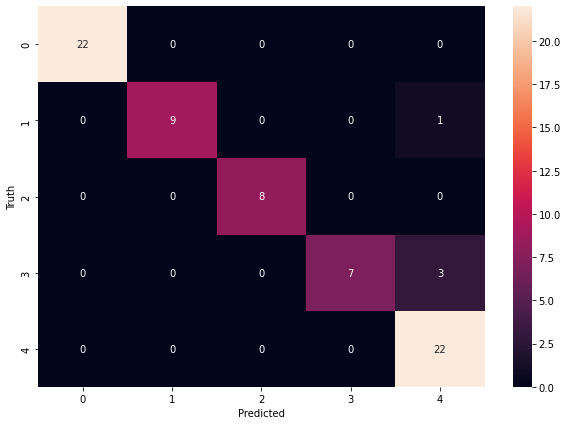

In [53]:
import seaborn as sn    #PLOTING THE SAME ABOVE CONFUSIN MATRIX ON SEABORN
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [62]:
class_dict

{'cropped': 0,
 'kobebryant': 1,
 'lebronjames': 2,
 'mjordan': 3,
 'satnamsingh': 4,
 'stephencurry': 5}

# Save the trained model


In [65]:
!pip install joblib                     
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

# Save class dictionary

In [66]:
import json
with open("class_dictionary.json","w") as f:     #SAVING THE CLASS DICTIONARY FOR FUTURE REFRENCES
    f.write(json.dumps(class_dict))